In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [2]:
#from platform import python_version
#python_version()

In [3]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [4]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Berkeley_73'

## Getting RA&DEC from Bica 2019

In [5]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]
ra, dec

(95.52083, -6.31639)

## Querying the data

In [6]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [7]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [8]:
query = """SELECT 
ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.2))'

In [9]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [10]:
data = job.get_results()
len(data)

4919

In [11]:
#data

## Converting to pandas

In [12]:
df = data.to_pandas()
df

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,95.610285,-6.490054,-3.004313,0.455713,2.388845,0.544048,NaN,19.933992,-0.088412,0.513623,NaN,NaN,215.454665,-9.388252
1,95.569905,-6.463332,NaN,NaN,NaN,NaN,1.526033,21.442005,NaN,NaN,NaN,NaN,215.412274,-9.412227
2,95.357969,-6.201397,0.225813,0.117506,0.175629,0.124728,0.927319,18.015738,0.520008,0.134146,NaN,NaN,215.079321,-9.483707
3,95.357955,-6.203546,5.129683,0.028176,-11.452859,0.028247,1.347376,15.178102,2.074716,0.030818,NaN,NaN,215.081264,-9.484679
4,95.364495,-6.192135,0.386808,0.263976,-0.883596,0.299385,2.045076,19.214386,0.893537,0.328705,NaN,NaN,215.073860,-9.473763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,95.533682,-6.124244,0.347586,0.410781,0.472908,0.465370,1.075523,19.777481,-0.262416,0.487410,NaN,NaN,215.088520,-9.292946
4915,95.526640,-6.119896,-0.420498,1.881088,0.062285,1.937577,1.894724,20.903137,-0.879875,2.208569,NaN,NaN,215.081406,-9.297265
4916,95.536897,-6.125716,-3.417563,0.293451,2.851903,0.326974,1.576080,19.106533,0.107970,0.394174,NaN,NaN,215.091302,-9.290745
4917,95.532312,-6.123568,-1.557853,0.058534,1.325891,0.064781,1.163252,16.697723,0.596154,0.060741,NaN,NaN,215.087289,-9.293863


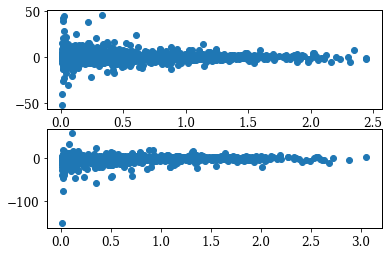

In [13]:
fig, ax = plt.subplots(2)

ax[0].scatter(df.pmra_error,df.pmra)
ax[1].scatter(df.pmdec_error,df.pmdec)

In [14]:
print(np.mean(df.pmdec), np.mean(df.pmdec_error)) ## por que pmra tem um erro muito maior?
print(np.mean(df.pmra), np.mean(df.pmra_error))

-0.33097711854227263 0.42623648047447205
0.1568142129725676 0.38364580273628235


In [15]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error


df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(1751, 4919)

## Dropping uknown values of pmra, pmdec or parallax.

In [16]:
ndf = df_condicionado.dropna(how='any',subset=['pmra', 'pmdec', 'parallax'])
ndf

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
3,95.357955,-6.203546,5.129683,0.028176,-11.452859,0.028247,1.347376,15.178102,2.074716,0.030818,NaN,NaN,215.081264,-9.484679
12,95.374327,-6.187638,14.326960,0.057190,-9.375877,0.058991,1.732979,16.544165,1.238919,0.065590,NaN,NaN,215.074210,-9.463010
13,95.383612,-6.184103,1.002140,0.057050,-0.583079,0.059290,0.983118,16.665001,0.153066,0.063035,NaN,NaN,215.075186,-9.453172
14,95.378902,-6.180647,1.530401,0.045896,-2.148326,0.047744,1.174671,16.153393,0.754880,0.049337,NaN,NaN,215.069931,-9.455817
26,95.394208,-6.170438,0.516274,0.081149,0.747071,0.085064,1.059742,17.219481,0.347659,0.091568,NaN,NaN,215.067567,-9.437640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,95.536367,-6.125008,1.035031,0.052204,-0.888407,0.052301,0.936429,16.210850,0.306528,0.057035,NaN,NaN,215.090421,-9.290900
4907,95.536637,-6.127315,1.009552,0.074769,-2.003723,0.083633,1.151455,17.098764,0.292917,0.087149,NaN,NaN,215.092634,-9.291692
4909,95.533379,-6.119922,0.578364,0.241328,4.765772,0.267849,1.925848,18.928787,0.745020,0.229725,NaN,NaN,215.084466,-9.291283
4910,95.545134,-6.121804,-0.660198,0.022847,-9.823463,0.023478,0.953572,14.601203,0.964745,0.023711,36.095726,13.063457,215.091467,-9.281671


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler

## Creating the arrays to perform the 2-D KNN fit and 5-D DBSCAN fit

In [18]:
X = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]
OI = np.dstack((ndf['pmra'],ndf['pmdec'], ndf['parallax']))[0]

(0.0, 3.0)

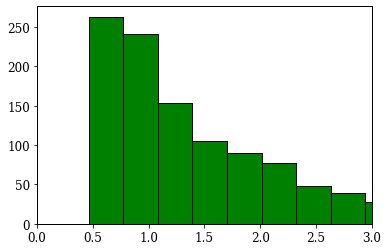

In [19]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=100).fit(cincoD)
distances, indices = nn.kneighbors(cincoD)

distances = np.sort(distances, axis=0)

medias = np.zeros(len(distances))
for i in range(len(distances)):
    medias[i] = np.mean(distances[:][i])

optimal_bin = np.histogram_bin_edges(medias, bins = 'fd')
a = plt.hist(medias, optimal_bin,  ec = 'k', color = 'green')
numero, bins = a[0],a[1]
plt.xlim(0,3)

In [20]:
listinha = bins[0:4]

for element in listinha:
    db = DBSCAN(eps=element, min_samples=100).fit(cincoD)
    #core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    #core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print('eps =', element)
    N_clus=len(set(labels))-(1 if -1 in labels else 0)
    print('Estimated no. of clusters: %d' % N_clus)
    n_in = list(db.labels_).count(0)
    print('Estimated no. points clustered: %d' % n_in)


eps = 0.4619805686525417
Estimated no. of clusters: 0
Estimated no. points clustered: 0
eps = 0.7721733010725682
Estimated no. of clusters: 1
Estimated no. points clustered: 172
eps = 1.0823660334925946
Estimated no. of clusters: 1
Estimated no. points clustered: 469
eps = 1.392558765912621
Estimated no. of clusters: 1
Estimated no. points clustered: 688


## Performing the KNN on the pmra and pmdec.

In [21]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

0.06990077534881334


<Figure size 360x360 with 0 Axes>

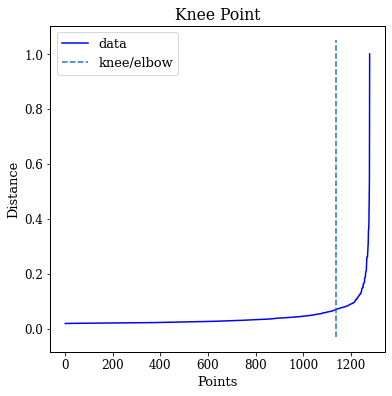

In [48]:
from sklearn.neighbors import NearestNeighbors

#vizinhos = np.sqrt(len(ndf)).astype(int)

vizinhos = 600

nn = NearestNeighbors(n_neighbors=vizinhos).fit(cincoD)

distances, indices = nn.kneighbors(cincoD)

distances = np.sort(distances, axis=0)
distances = distances[:,-1]

distances = distances/np.max(distances)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


eps_opt = distances[knee.knee]

print(distances[knee.knee])

## Performing DBSCAN

Estimated no. of clusters: 0
Estimated no. of noise points: 1281
Estimated no. points clustered: 0


Text(0, 0.5, 'pmdec')

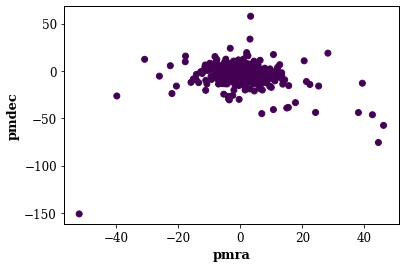

In [47]:
db = DBSCAN(eps=0.4, min_samples=100).fit(cincoD)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)


plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            )
plt.xlabel("pmra", fontweight = 'bold')
plt.ylabel("pmdec", fontweight = 'bold')

## Getting the points that are clustered

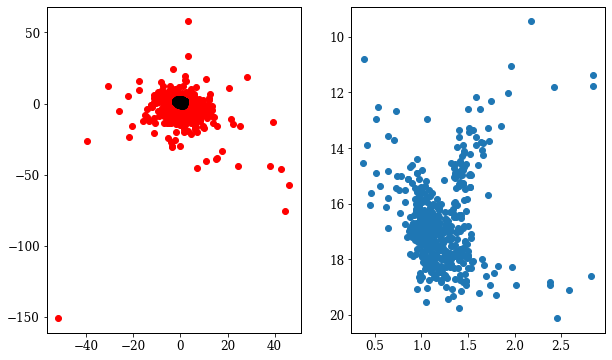

In [24]:
pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T


subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]
subset = subset.reset_index(drop=True)

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].scatter(xin,yin, color = 'k', zorder = 100)
ax[0].scatter(xout,yout, color = 'red')


ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


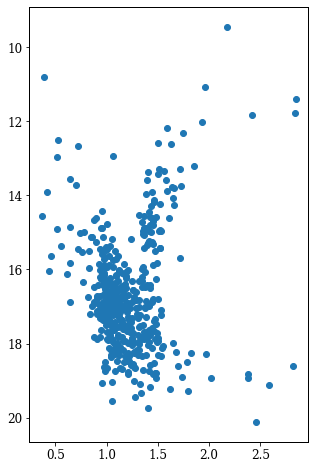

In [25]:
plt.figure(figsize=(5,8))
plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

## Constructing a RDP and histograms of the clusters parameters

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

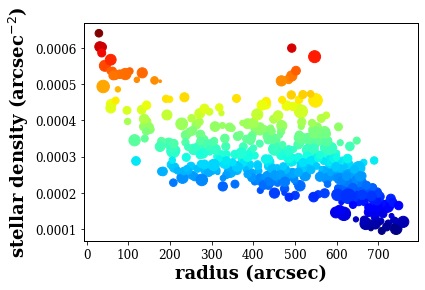

In [26]:
from astropy.coordinates import SkyCoord
from astropy import units

catalog = SkyCoord(ra=subset['ra']*units.degree, dec=subset['dec']*units.degree, frame='fk5')

nstar = len(subset)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([subset['ra']*np.cos(subset['dec']*np.pi/180.0), subset['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(subset['ra'], weights=den_data)
std_x = np.average((subset['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(subset['dec'], weights=den_data)
std_y = np.average((subset['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## Plotting histograms

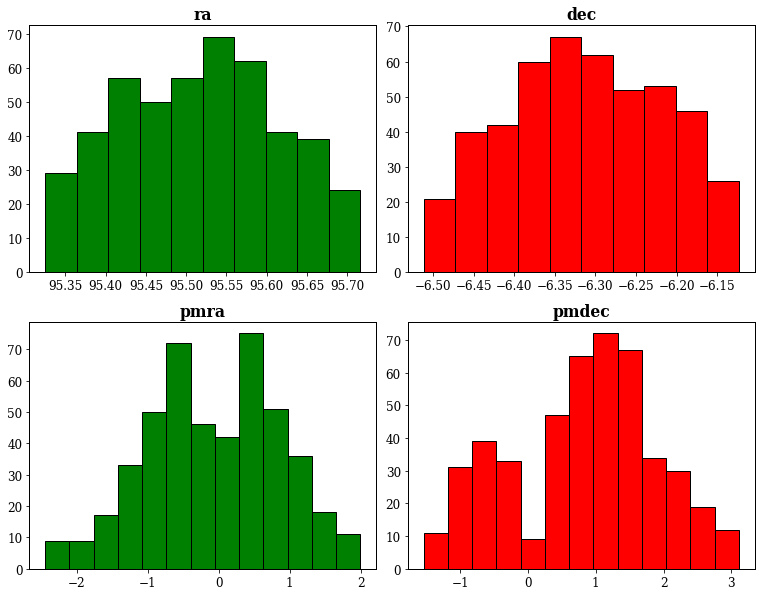

In [27]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


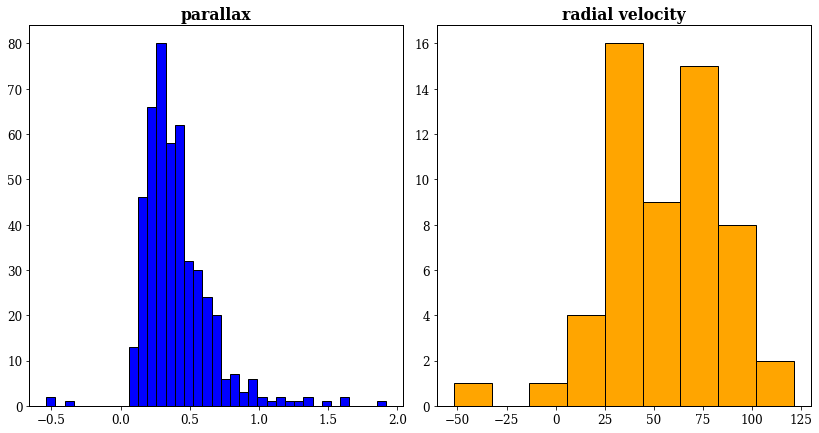

In [28]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Gaussian fit

In [29]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 37
    # variables        = 3
    chi-square         = 1235.10538
    reduced chi-square = 36.3266287
    Akaike info crit   = 135.795765
    Bayesian info crit = 140.628519
[[Variables]]
    amplitude:  29.5534613 +/- 1.46845028 (4.97%) (init = 32.72036)
    center:     0.32096907 +/- 0.00939610 (2.93%) (init = 0.2812726)
    sigma:      0.16377011 +/- 0.00939623 (5.74%) (init = 0.1363348)
    fwhm:       0.38564913 +/- 0.02212642 (5.74%) == '2.3548200*sigma'
    height:     71.9919276 +/- 3.57712158 (4.97%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


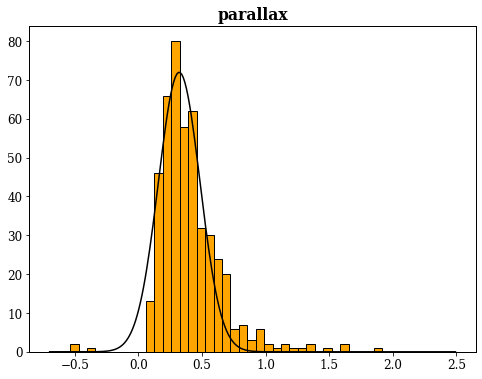

In [30]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(1.3*bins[0],1.3*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

In [31]:
#primeiro_clip = subset.parallax[np.where((subset.parallax < sigma_parallax_up ) & (subset.parallax > sigma_parallax_down))[0]]
#primeiro_clip

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 10
    # variables        = 3
    chi-square         = 282.149021
    reduced chi-square = 40.3070030
    Akaike info crit   = 39.3985028
    Bayesian info crit = 40.3062581
[[Variables]]
    amplitude:  24.1315486 +/- 1.67129918 (6.93%) (init = 11.74691)
    center:     95.5137989 +/- 0.01013835 (0.01%) (init = 95.49884)
    sigma:      0.15293461 +/- 0.01391927 (9.10%) (init = 0.08701418)
    fwhm:       0.36013347 +/- 0.03277738 (9.10%) == '2.3548200*sigma'
    height:     62.9490971 +/- 3.42593748 (5.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.803


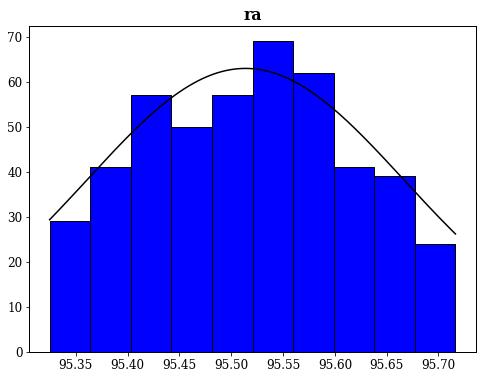

In [32]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 13
    # variables        = 3
    chi-square         = 1396.43401
    reduced chi-square = 139.643401
    Akaike info crit   = 66.7974610
    Bayesian info crit = 68.4923091
[[Variables]]
    amplitude:  182.881783 +/- 18.8823800 (10.32%) (init = 183.1932)
    center:    -0.01021367 +/- 0.13577129 (1329.31%) (init = -0.07484681)
    sigma:      1.17090896 +/- 0.14630468 (12.49%) (init = 0.9252181)
    fwhm:       2.75727983 +/- 0.34452119 (12.49%) == '2.3548200*sigma'
    height:     62.3099506 +/- 6.24508819 (10.02%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.629


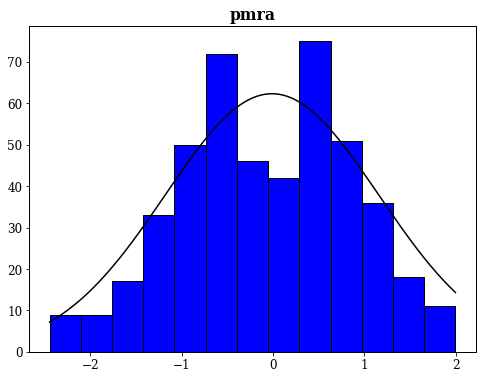

In [33]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 10
    # variables        = 3
    chi-square         = 195.034456
    reduced chi-square = 27.8620651
    Akaike info crit   = 35.7059115
    Bayesian info crit = 36.6136667
[[Variables]]
    amplitude:  23.6155887 +/- 1.30475997 (5.52%) (init = 14.8929)
    center:    -6.30887972 +/- 0.00796502 (0.13%) (init = -6.274222)
    sigma:      0.14712350 +/- 0.01064307 (7.23%) (init = 0.1079196)
    fwhm:       0.34644937 +/- 0.02506252 (7.23%) == '2.3548200*sigma'
    height:     64.0363853 +/- 2.86811973 (4.48%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.786


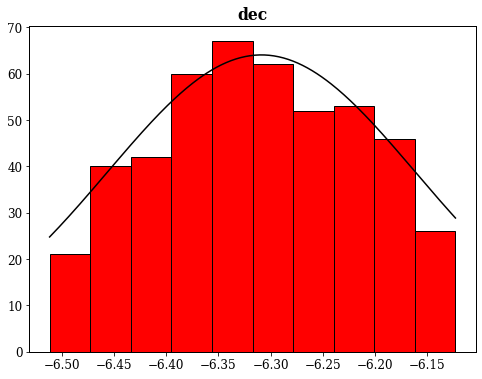

In [34]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 13
    # variables        = 3
    chi-square         = 2365.68629
    reduced chi-square = 236.568629
    Akaike info crit   = 73.6503631
    Bayesian info crit = 75.3452112
[[Variables]]
    amplitude:  187.385201 +/- 26.4314948 (14.11%) (init = 109.9484)
    center:     1.00000864 +/- 0.19926104 (19.93%) (init = 0.9793626)
    sigma:      1.26497548 +/- 0.21746396 (17.19%) (init = 0.5817375)
    fwhm:       2.97878957 +/- 0.51208847 (17.19%) == '2.3548200*sigma'
    height:     59.0967050 +/- 8.03432364 (13.60%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.639


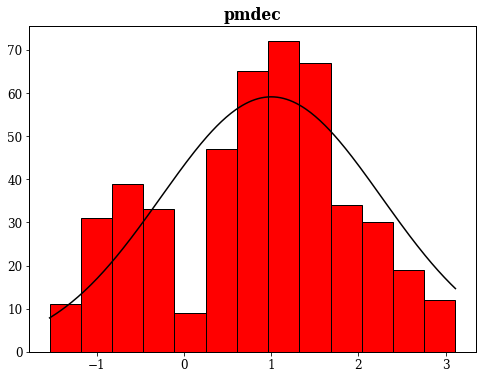

In [35]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 9
    # variables        = 3
    chi-square         = 65.2326636
    reduced chi-square = 10.8721106
    Akaike info crit   = 23.8266217
    Bayesian info crit = 24.4182954
[[Variables]]
    amplitude:  1253.40322 +/- 213.746657 (17.05%) (init = 1036.925)
    center:     60.0413570 +/- 6.84671394 (11.40%) (init = 56.23143)
    sigma:      35.1519270 +/- 7.07103377 (20.12%) (init = 21.60261)
    fwhm:       82.7764608 +/- 16.6510117 (20.12%) == '2.3548200*sigma'
    height:     14.2249830 +/- 2.40028324 (16.87%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.599


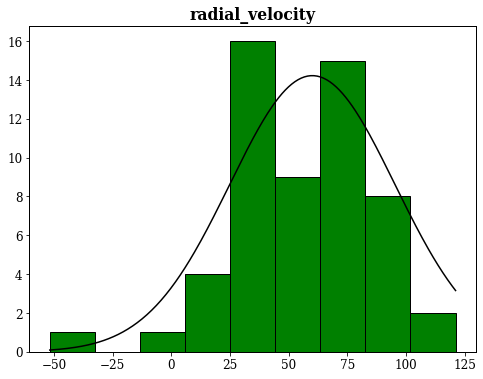

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()


In [37]:
sigma = 3

paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]

print(paralaxe_up,valores_paralaxe[0], paralaxe_down)

ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]

print(ra_up,valores_ra[0],ra_down)

pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]

print(pmra_up,valores_pmra[0],pmra_down)

dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]

print(dec_up, valores_dec[0], dec_down)

pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]

print(pmdec_up,valores_pmdec[0],pmdec_down)

radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]

print(radvel_up, valores_radial_velocity[0], radvel_down)

0.8122793969111666 0.3209690695341825 -0.17034125784280157
95.97260268502073 95.51379886014423 95.05499503526774
3.5025132097223746 -0.01021366532532495 -3.5229405403730243
-5.867509217478467 -6.308879724055542 -6.750250230632616
4.794935092937937 1.0000086397891552 -2.7949178133596266
165.49713808800504 60.041356957411146 -45.414424173182745


In [38]:
clip = subset.loc[(subset.parallax < paralaxe_up ) & (subset.parallax > paralaxe_down) & (subset.ra>ra_down) & (subset.ra<ra_up)
          & (subset.dec>dec_down) & (subset.dec<dec_up) & (subset.pmra>pmra_down) & (subset.pmra<pmra_up) & (subset.pmdec>pmdec_down) & (subset.pmdec<pmdec_up)]
len(clip)

440

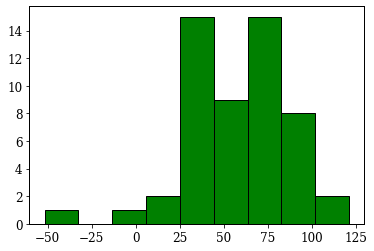

In [39]:
ra_vel = clip.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']

plt.hist(data, optimal_bin, ec = 'k',color = 'green');

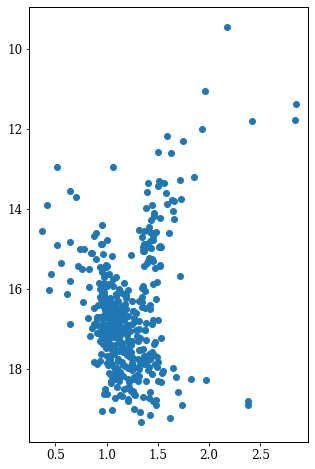

In [40]:
plt.figure(figsize=(5,8))
plt.scatter(clip['bp_rp'],clip['phot_g_mean_mag'])
plt.gca().invert_yaxis()

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

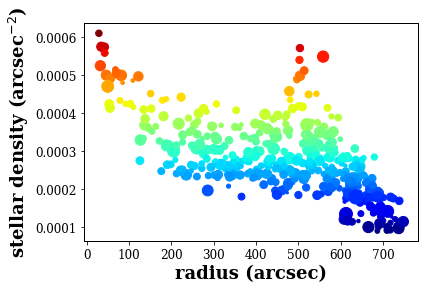

In [41]:
from astropy.coordinates import SkyCoord
from astropy import units

catalog = SkyCoord(ra=clip['ra']*units.degree, dec=clip['dec']*units.degree, frame='fk5')

nstar = len(clip)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip['ra']*np.cos(clip['dec']*np.pi/180.0), clip['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip['ra'], weights=den_data)
std_x = np.average((clip['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip['dec'], weights=den_data)
std_y = np.average((clip['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(clip['phot_g_mean_mag'])-clip['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



In [42]:
center

<SkyCoord (ICRS): (ra, dec) in deg
    (95.51343555, -6.30874438)>

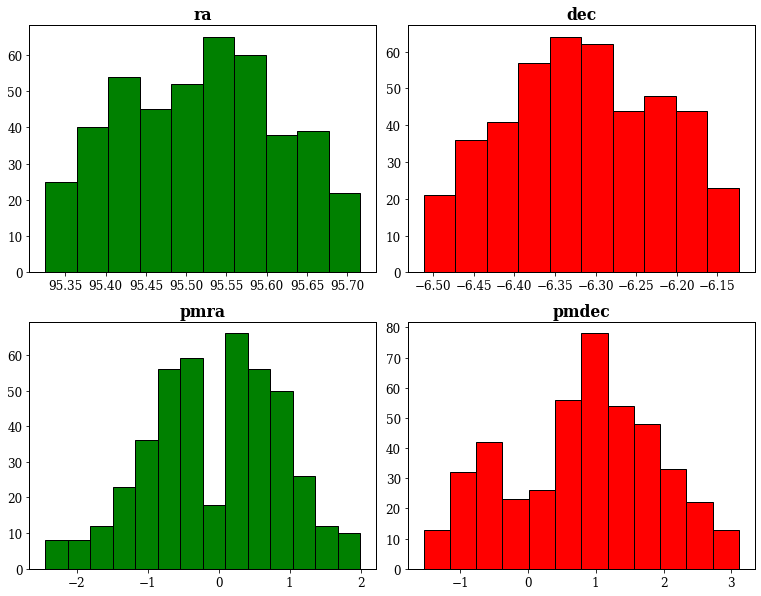

In [43]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip['ra'], bins = 'fd')
ax1.hist(clip['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip['pmra'], bins = 'fd')
ax2.hist(clip['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip['dec'], bins = 'fd')
ax3.hist(clip['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip['pmdec'], bins = 'fd')
ax4.hist(clip['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


In [44]:
len(clip),len(subset)

(440, 469)

## Doing more sigma clippings

469
406
404
404
404
404
404
404


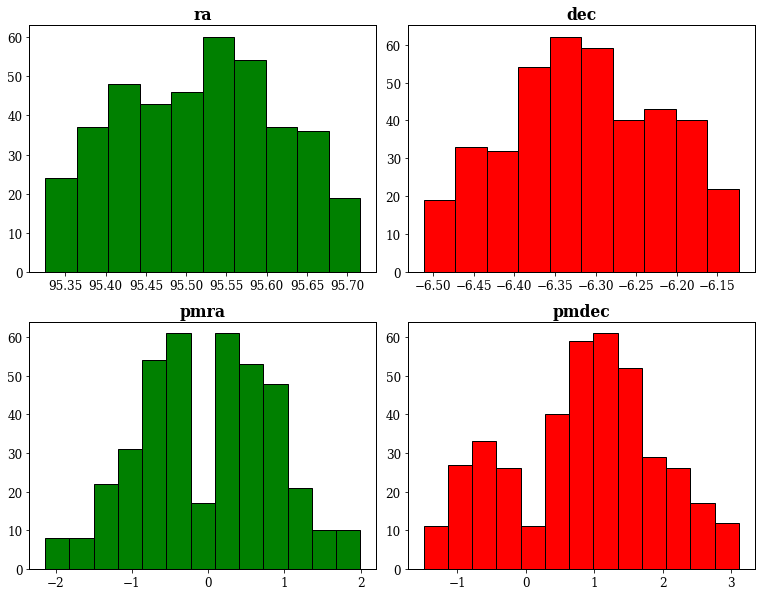

In [45]:
gmodel = GaussianModel()
clip_loop = subset

for i in range(7):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]
    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]
    dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]
    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down) & (clip_loop.ra>ra_down) & (clip_loop.ra<ra_up) & (clip_loop.dec>dec_down) & (clip_loop.dec<dec_up) & (clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) & (clip_loop.pmdec<pmdec_up)]

    
print(len(clip_loop))

fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax1.hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax2.hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax3.hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax4.hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


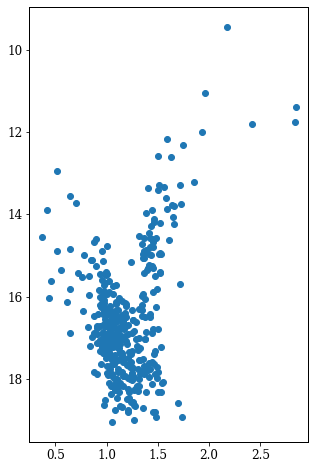

In [46]:
plt.figure(figsize=(5,8))
plt.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'])
plt.gca().invert_yaxis()